In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sb
import tensorflow as tf
from sklearn.linear_model import LinearRegression

## Dataset
SeoulBikeData

In [2]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]
df = pd.read_csv(r"D:\Coading Part\Programming\Learning Tools\Mahine Learning for Everybody\SeoulBikeData.csv").drop(["Date", "Holiday", "Seasons"], axis=1)

In [3]:
df

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Yes
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Yes
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Yes
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Yes


In [4]:
df.columns = dataset_cols
df['functional'] = (df["functional"] == "Yes").astype(int)
df = df[df['hour'] == 12]
df = df.drop(['hour'], axis=1)

In [5]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


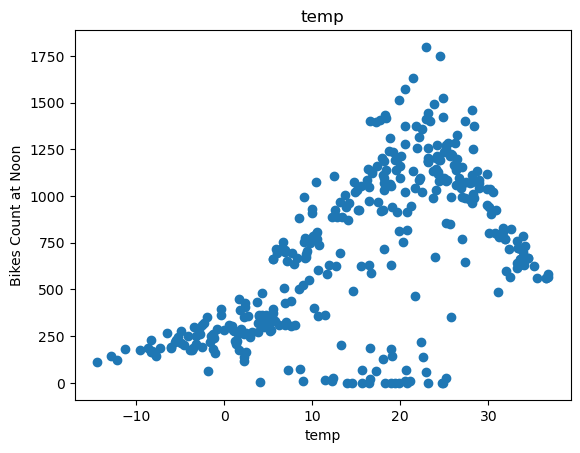

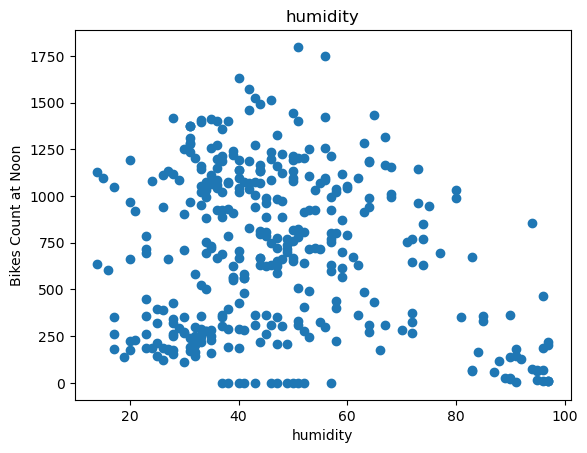

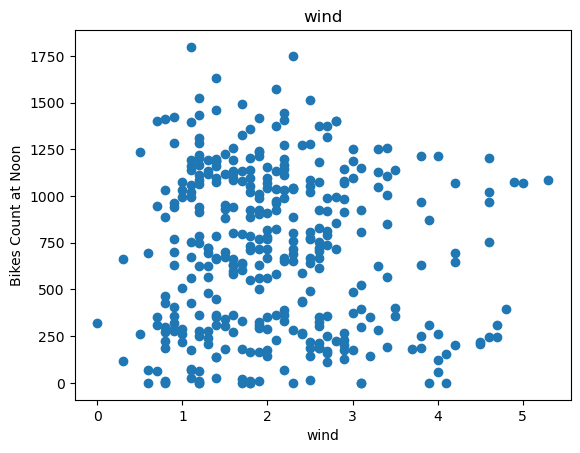

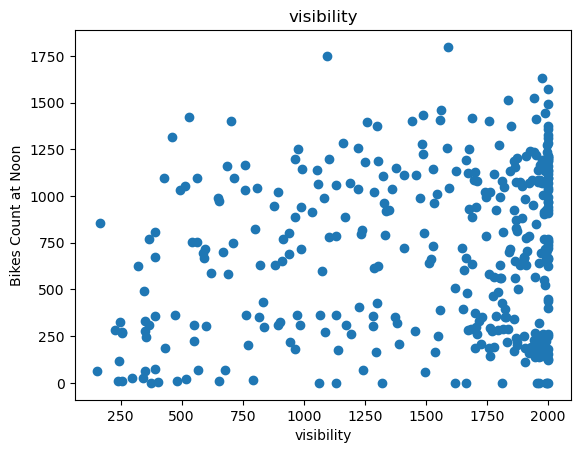

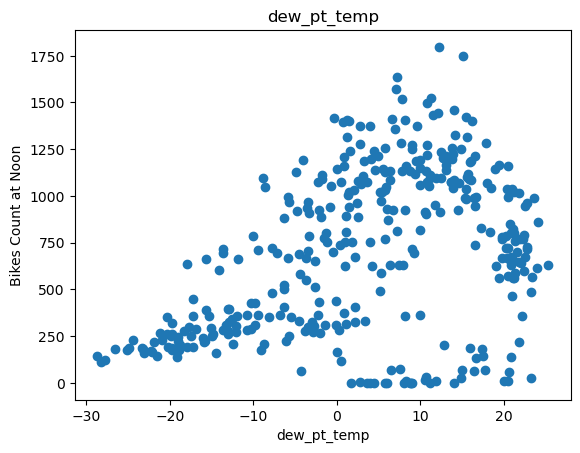

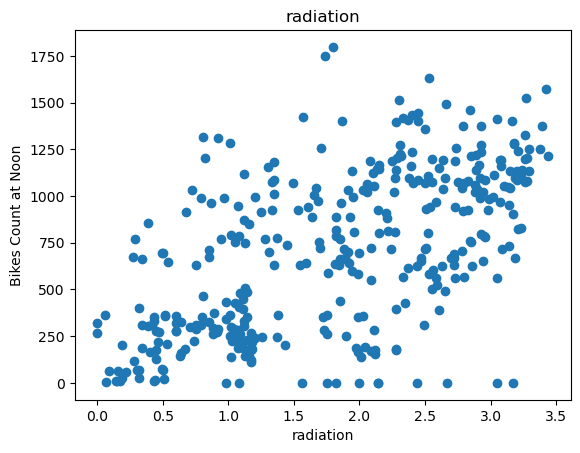

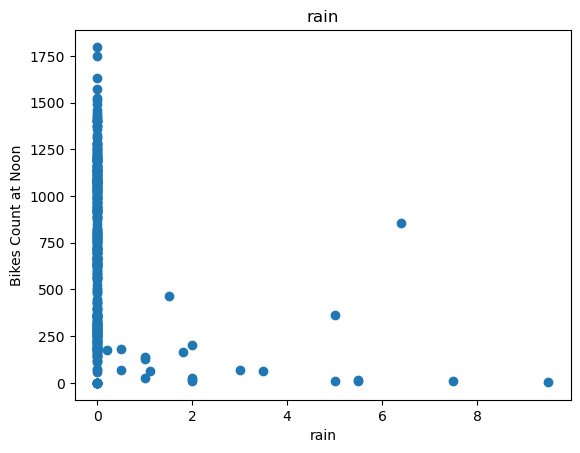

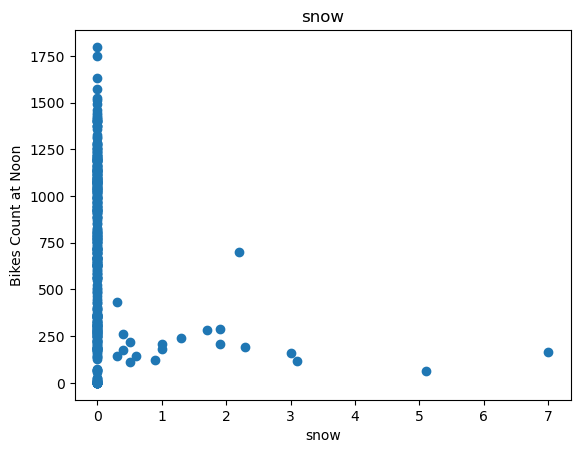

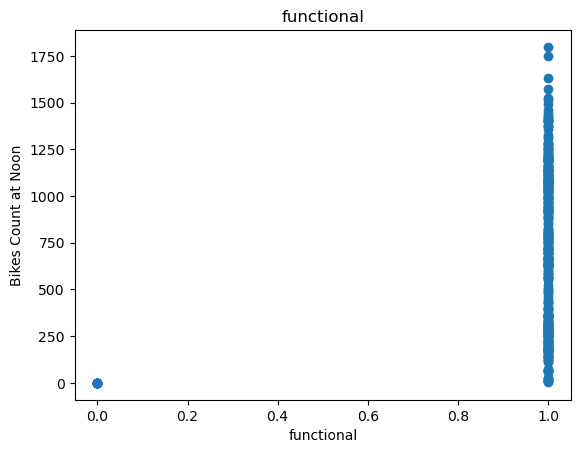

In [6]:
for label in df.columns[1:]:
    plt.scatter(df[label], df['bike_count'])
    plt.title(label)
    plt.ylabel('Bikes Count at Noon')
    plt.xlabel(label)
    plt.show()

In [7]:
df = df.drop(["wind", "visibility", "functional"], axis=1)

In [8]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


## Train/valid/test dataset

In [9]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [10]:
def get_xy(dataframe, y_label, x_label=None):
    dataframe = copy.deepcopy(dataframe)
    if x_label is None:
        X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
    else:
        if len(x_label) == 1:
            X = dataframe[x_label[0]].values.reshape(-1, 1)
        else:
            X = dataframe[x_label].values
            
    y = dataframe[y_label].values.reshape(-1, 1)
    data = np.hstack
    
    return data, X, y

In [11]:
_, X_train_temp, y_train_temp = get_xy(train, "bike_count", x_label=['temp']) 
_, X_val_temp, y_val_temp = get_xy(val, "bike_count", x_label=['temp']) 
_, X_test_temp, y_test_temp = get_xy(test, "bike_count", x_label=['temp']) 

In [12]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [13]:
temp_reg.score(X_test_temp, y_test_temp)

0.35339112600464806

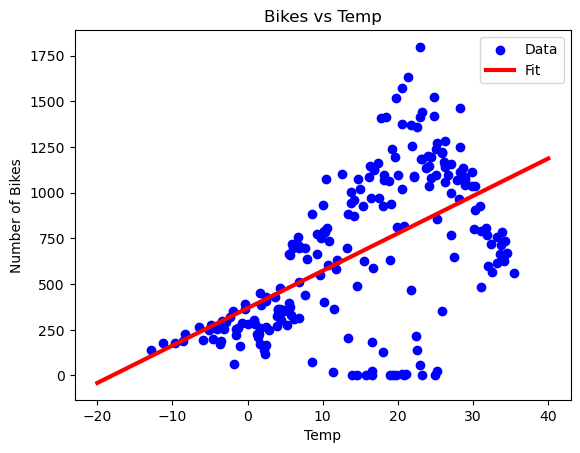

In [14]:
plt.scatter(X_train_temp, y_train_temp, label='Data', color='blue')
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1)), label='Fit', color='red', linewidth=3)
plt.legend()
plt.title('Bikes vs Temp')
plt.ylabel("Number of Bikes")
plt.xlabel("Temp")
plt.show()

## Multiple Linear regression

In [15]:
df.columns

Index(['bike_count', 'temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain',
       'snow'],
      dtype='object')

In [16]:
_, X_train_all, y_train_all = get_xy(train, "bike_count", x_label=df.columns[1:]) 
_, X_val_all, y_val_all = get_xy(val, "bike_count", x_label=df.columns[1:]) 
_, X_test_all, y_test_all = get_xy(test, "bike_count", x_label=df.columns[1:]) 

In [17]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [18]:
all_reg.score(X_test_all, y_test_all) # Rsquare improved, 0.3 -> 0.5

0.517217888641964

## Regression with Neural Net

In [19]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
temp_nn_model = tf.keras.Sequential([
  temp_normalizer,
  tf.keras.layers.Dense(1)
])

In [21]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [ ]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp,
    verbose = 0,
    epochs = 1000,
    validation_data = (X_val_temp, y_val_temp)
)